# Реализация линейной регрессии

---
Задача линейной регрессии провести линию так, чтобы минимизировать ошибку предсказания (или провести линию так, чтобы она наилучшим образом описывала поведение наших данных)
Одной из ошибок может служить среднекваратичная ошибка mean_squared error (MSE):
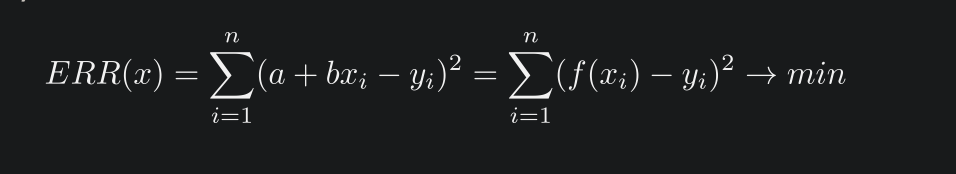
Нам необходимо минимизровать данную функцию. Как это можно сделать?

---

### Градиентный спуск
По-простому, градиент — это отрезок, который указывает направление максимального роста функции. По аналогии с подъемом в гору, то куда смотрит градиент, там и есть самый крутой подъем к вершине горы. Развивая пример с горой, вспоминаем, что на самом деле нам нужен самый крутой спуск, чтобы как можно быстрее достичь низины, то есть минимума — места где функция не возрастает и не убывает. В этом месте производная будет равна нулю. Следовательно, нам нужен не градиент, а антиградиент. Для нахождения антиградиента нужно всего лишь умножить градиент на -1 (минус один).

Обратим внимание на то, что функция может иметь несколько минимумов, и опустившись в один из них по предложенному далее алгоритму, мы не сможем найти другой минимум, который возможно находится ниже найденного.

Алгоритм:
1. Определяем псевдослучайным образом координаты коэффициентов а и b. В нашем примере, мы будем определять коэффициенты вблизи нуля. Это является распространённой практикой, однако для каждого случая может быть предусмотрена своя практика.
2. От координаты  вычитаем значение частной производной 1-го порядка в точке . Так, если производная будет положительная, то функция возрастает. Следовательно, отнимая значение производной, мы будем двигаться в обратную сторону роста, то есть в сторону спуска. Если производная отрицательна, значит функция в этой точке убывает и отнимая значение производной мы двигаемся в сторону спуска.
3. Проводим аналогичную операцию с координатой b: вычитаем значение частной производной в точке .
4. Для того, чтобы не перескочить минимум и не улететь в далекий космос, необходимо установить размер шага в сторону спуска.
5. После того, как мы из заданных координат  и  вычли значения производных, получаем новые координаты  и . Делаем следующий шаг (вычитание), уже из рассчитанных координат. И так цикл запускается вновь и вновь, до тех пор, пока не будет достигнута требуемая сходимость.
\
\
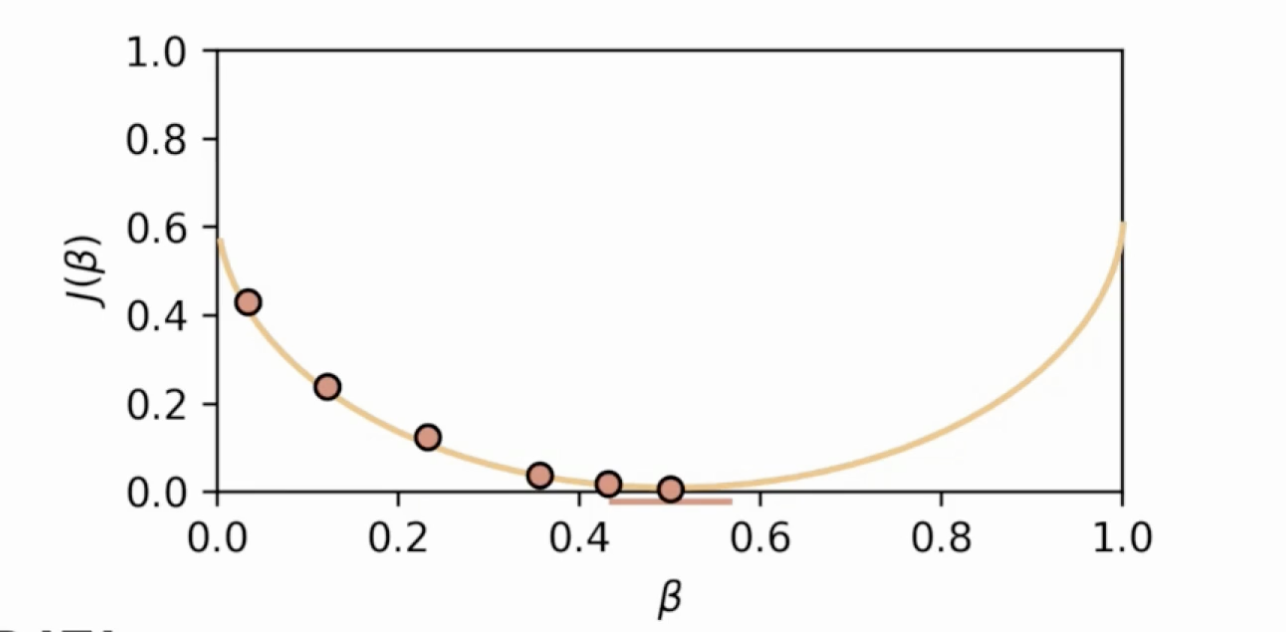

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

## Создадим простой датасет

In [61]:
df = pd.DataFrame({'x': [0.9, 4.11, 4.82, 8.53, 8.9], 'y': [1.91, 1.84, 4.47, 6.38, 3.92]})

<Axes: xlabel='x', ylabel='y'>

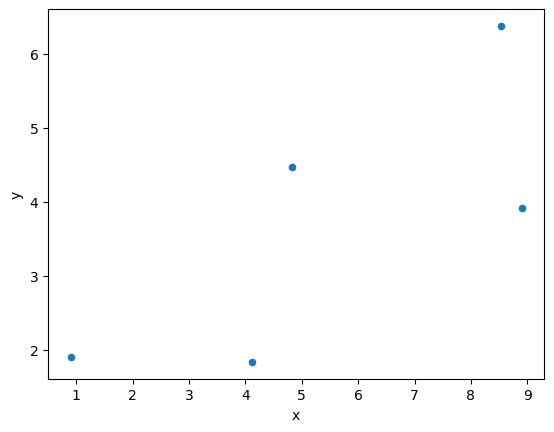

In [17]:
df.plot(x='x', y='y', kind='scatter')

### Примем начальные коэффициенты линейного уравнения 

In [62]:
m, b = 1,1

In [60]:
df['y_pred'] = df['x'] * m + b

In [20]:
df

,x,y,y_pred
0,0.90,1.91,1.90
1,4.11,1.84,5.11
2,4.82,4.47,5.82
3,8.53,6.38,9.53
4,8.90,3.92,9.90


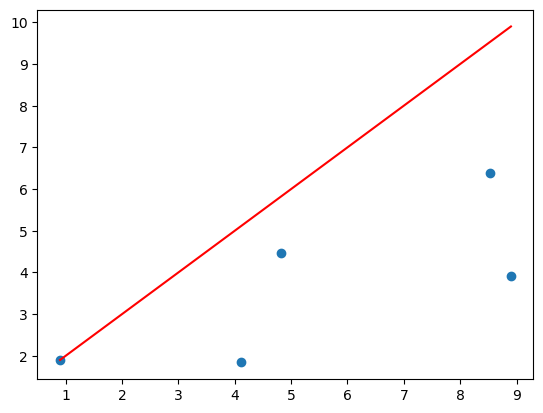

In [22]:
plt.scatter(df['x'], df['y'])
plt.plot(df['x'], df['y_pred'], ls='-', color='red')

In [63]:
learning_rate = 0.01 # Шаг обучения

df['y_pred_prev'] = df['x'] * m + b   # Предыдущее предсказание 
df['error_prev'] = (df['y'] - df['y_pred_prev'])**2   # Предыдущая ошибка. Выбрана метрика MSE

for _ in tqdm(range(100)):
    df['m_change'] = (df['y'] - df['y_pred_prev']) * (df['x'])   # Применяем градиентный спуск. Смотрим в какую сторону спускаться (находим производную)
    df['b_change'] = -(df['y'] - df['y_pred_prev'])

    m += learning_rate*df['m_change'].mean()      # Меняем коэффициенты
    b += learning_rate*df['b_change'].mean()

    df['y_pred_curr'] = df['x'] * m + b
    df['error_curr'] = (df['y'] - df['y_pred_curr'])**2

    if df['error_curr'].mean() < df['error_prev'].mean():  # Если ошибка начинает увеличиваться, прекращаем поиск
        df['y_pred_prev'] = df['y_pred_curr']
        df['error_prev'] = df['error_curr']
        print(df['error_prev'].mean())
    else:
        break


  0%|          | 0/100 [00:00<?, ?it/s]

5.270991250811761
2.8083073750125425
1.8560515832011812
1.4878691913387558
1.3455445902006324
1.2905580267280468
1.269344772710684
1.2611916810906627
1.2580891074740916
1.2569397731547114
1.2565459807722523
1.2564445892953378


In [64]:
df

,x,y,y_pred_prev,error_prev,m_change,b_change,y_pred_curr,error_curr
0,0.90,1.91,1.492619,0.174207,0.375643,-0.417381,1.491542,0.175107
1,4.11,1.84,3.012791,1.375439,-4.820172,1.172791,3.009860,1.368572
2,4.82,4.47,3.349029,1.256576,5.403081,-1.120971,3.345687,1.264080
3,8.53,6.38,5.105988,1.623107,10.867323,-1.274012,5.100503,1.637113
4,8.90,3.92,5.281210,1.852894,-12.114772,1.361210,5.275511,1.837411


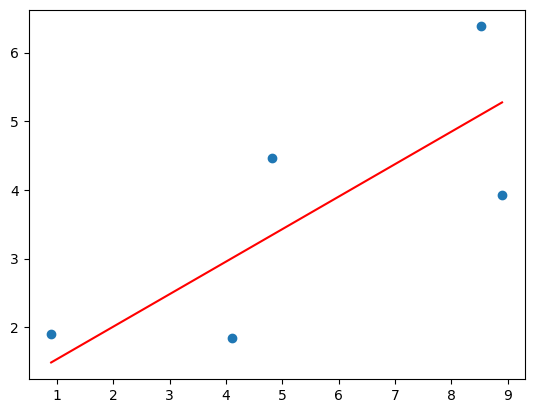

In [34]:
plt.scatter(df['x'], df['y'])
plt.plot(df['x'], df['y_pred_curr'], ls='-', color='red')

## Реализация множественной регресии

In [35]:
df = pd.DataFrame({'x1': [0.9, 4.11, 4.82, 8.53, 8.9], 'x2': [1.1, 4.31, 5.02, 8.73, 9.1], 'y': [1.91, 1.84, 4.47, 6.38, 3.92]})
m1, m2, b = 0,0,0
learning_rate = 0.01

df['y_pred_prev'] = df['x1'] * m1 + df['x2']*m2 + b
df['error_prev'] = (df['y'] - df['y_pred_prev'])**2

for _ in range(100):
    df['m1_change'] = (df['y'] - df['y_pred_prev']) * (df['x1'])
    df['m2_change'] = (df['y'] - df['y_pred_prev']) * (df['x2'])
    df['b_change'] = -(df['y'] - df['y_pred_prev'])

    m1 += learning_rate*df['m1_change'].mean()
    m2 += learning_rate*df['m2_change'].mean()
    b += learning_rate*df['b_change'].mean()

    df['y_pred_curr'] = df['x1'] * m1 + df['x2'] * m2 + b
    df['error_curr'] = (df['y'] - df['y_pred_curr'])**2

    if df['error_curr'].mean() < df['error_prev'].mean():
        df['y_pred_prev'] = df['y_pred_curr']
        df['error_prev'] = df['error_curr']
        print(df['error_prev'].mean())
    else:
        break


2.3289097117169253
1.6765094050295606
1.6483583113323959


In [36]:
m1, m2, b

(0.3047718585170506, 0.31583811649724464, -0.055331289900970186)

In [37]:
0.9*m1 + m2*1.1 + b 

0.5663853109113446